# Spotify Weighting System
The weighting system used to rank artists is based on data downloaded from Spotify on my usage. It shows how much time I spend listening to a song which I can then use to find how much per artist. 

The per artist weighting system is based on three equally important factors: 
- Average listen time (t)
- Total listens (L)
- Listen recency (R)

***Relevance = t X L X R***

### Imports and setup

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date

In [176]:
stream_hist = pd.read_json('../data/Spotify_UsageData_29May2020/StreamingHistory0.json')

# Set index as date
stream_hist = stream_hist.set_index('endTime')

# Sort values
stream_hist = stream_hist.sort_values(by='endTime', ascending=False)

# Set index as Timestamp
stream_hist.index = pd.to_datetime(stream_hist.index)

stream_hist.head(5)

,artistName,trackName,msPlayed
endTime,,,
2019-11-26 18:56:00,New York Dolls,Personality Crisis,0
2019-11-26 18:56:00,Steve Miller Band,Fly Like An Eagle,0
2019-11-26 18:56:00,Canned Heat,Going Up The Country,3300
2019-11-26 18:56:00,Black Sabbath,Paranoid,1382
2019-11-26 18:56:00,Boston,More Than a Feeling,120988


# &nbsp;

## Average Listen Time
This section finds the average listen per artist and compares it to the average.

In [177]:
mean_played = stream_hist.msPlayed.mean()
mean_played

44173.3851

Group the DataFram by the artist's name and finds the average listen for that artist.

In [178]:
# Listen time ranges per artist
listen_ranges = stream_hist.groupby('artistName').msPlayed.agg('mean').sort_values(ascending=False)
listen_ranges

artistName
The Tim Ferriss Show    877573.0
Harvey McKay            432853.0
Crackazat               396623.0
Cameo                   393573.0
Tiger Stripes           384728.0
                          ...   
The Undisputed Truth         0.0
The Vines                    0.0
OC                           0.0
O.T. Genasis                 0.0
Lil Xan                      0.0
Name: msPlayed, Length: 1137, dtype: float64

## &nbsp;

### Artist vs Average

In [179]:
# Deducts total mean listen time from each artist's
artist_relevance = listen_ranges.map(lambda x: x - mean_played)
artist_relevance

artistName
The Tim Ferriss Show    833399.6149
Harvey McKay            388679.6149
Crackazat               352449.6149
Cameo                   349399.6149
Tiger Stripes           340554.6149
                           ...     
The Undisputed Truth    -44173.3851
The Vines               -44173.3851
OC                      -44173.3851
O.T. Genasis            -44173.3851
Lil Xan                 -44173.3851
Name: msPlayed, Length: 1137, dtype: float64

### &nbsp;

#### Plot 
The top 20 artists are plotted below.

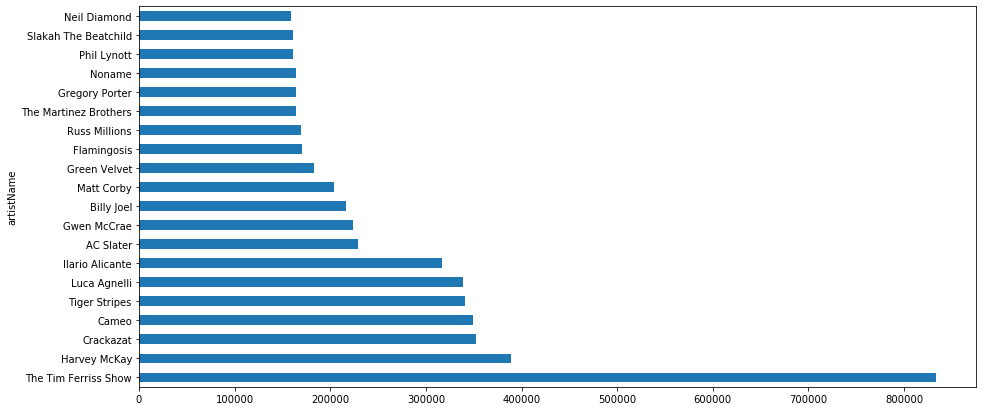

In [180]:
fig, ax = plt.subplots(figsize=(15,7))
artist_relevance.head(20).plot.barh(ax=ax)

## &nbsp;

### Remove podcasts
The most listened per artist are mostly podcasts and I'd like to exclude these from the analysis. A quick way to do this would be to limit only songs with a listen time less than 6 minutes. **This is obviously not the optimal way to decide whether it's a podcast; comparing the song name to Spotify's API would be better.**

#### Drop rows based on time
Any tracks more than 6 minutes (360000ms) are dropped.

In [181]:
stream_hist = stream_hist.drop(stream_hist[stream_hist.msPlayed > 360000].index)
stream_hist.head(15)

,artistName,trackName,msPlayed
endTime,,,
2019-11-26 18:56:00,New York Dolls,Personality Crisis,0
2019-11-26 18:56:00,Steve Miller Band,Fly Like An Eagle,0
2019-11-26 18:56:00,Canned Heat,Going Up The Country,3300
2019-11-26 18:56:00,Black Sabbath,Paranoid,1382
2019-11-26 18:56:00,Boston,More Than a Feeling,120988
2019-11-26 18:56:00,Frank Zappa,Bobby Brown Goes Down,0
2019-11-26 18:56:00,Cream,White Room,4994
2019-11-26 18:56:00,T. Rex,I Love To Boogie,0
2019-11-26 18:56:00,Status Quo,Pictures of Matchstick Men - Mono Version,990


In [182]:
mean_played = stream_hist.msPlayed.mean()
mean_played

42710.755972180224

In [183]:
# Listen time ranges per artist
listen_ranges = stream_hist.groupby('artistName').msPlayed.agg('mean').sort_values(ascending=False)
artist_relevance = listen_ranges.map(lambda x: x - mean_played)

### &nbsp;

#### Plot with adjustments
I haven't heard of many of the artists in the graph. I think counting total listens might solve this.

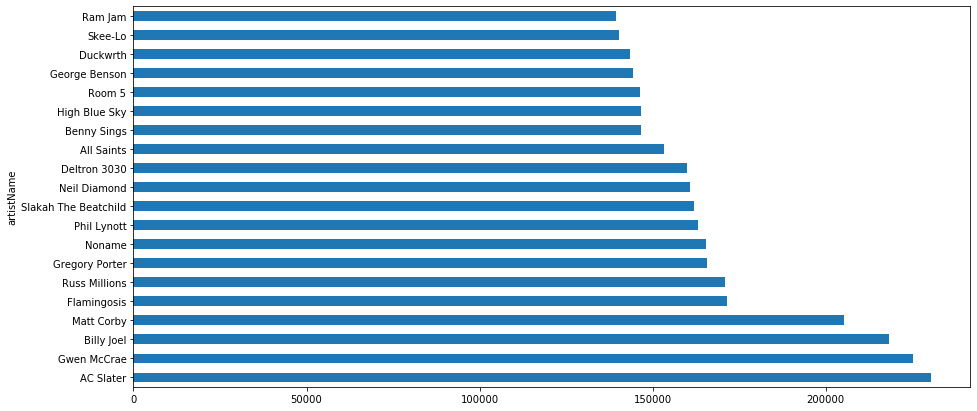

In [184]:
fig, ax = plt.subplots(figsize=(15,7))
artist_relevance.head(20).plot.barh(ax=ax)

**Can't say I know many of these artists. Reducing the weight this parameter might be done in future.**

# &nbsp;

## Total Listens
This section counts the total number of listens per artist

In [185]:
# How many songs per artists
songs_per_artist = stream_hist.groupby('artistName').artistName.count().sort_values(ascending=False)
songs_per_artist

artistName
Drake                             254
The Rolling Stones                237
The Beatles                       222
Tame Impala                       190
The Weeknd                        172
                                 ... 
Stephan Bodzin                      1
Happy Mondays                       1
Harold Melvin & The Blue Notes      1
Harry Garfield                      1
Future Islands                      1
Name: artistName, Length: 1128, dtype: int64

**This seems a little more reflective of my actual listens. In future weighting I might give more weight to this.**

# &nbsp;

## Listen Recency
This ranks the artist based on how much of their listens have been recent. This will get the most recent date and award points based on how few days have passed since the most recent date.

### Most recent date

In [186]:
# Sort the DataFrame in descending order and find the date of the 0th entry
recent_date = stream_hist.iloc[0].name
recent_date

Timestamp('2019-11-26 18:56:00')

#### &nbsp;

### Days passed since the first entry
Finds the number of minutes passed since the most recent date. The value is divides 1 so that the most recent is 1 and the less recent going towards zero.

In [187]:
# stream_hist['daysPassed'] = stream_hist['daysPassed'].map(lambda x: (recent_date-x) / np.timedelta64(1, 'm'), stream_hist.index)

# Iterate over index and subract most recent date from each entry
mins_since=[]
for t_stamp in stream_hist.index:
    # Gets time in minutes since most recent
    minute = (recent_date - t_stamp) / np.timedelta64(1, 'm')
    if minute == 0.0:
        # If no time has passed max of 1 is given
        mins_since.append(1)
    else:
        # Divde 1 by time passed
        mins_since.append(1 / minute)
        
stream_hist['recencyScore'] = mins_since
stream_hist.head(15)

,artistName,trackName,msPlayed,recencyScore
endTime,,,,
2019-11-26 18:56:00,New York Dolls,Personality Crisis,0,1.00
2019-11-26 18:56:00,Steve Miller Band,Fly Like An Eagle,0,1.00
2019-11-26 18:56:00,Canned Heat,Going Up The Country,3300,1.00
2019-11-26 18:56:00,Black Sabbath,Paranoid,1382,1.00
2019-11-26 18:56:00,Boston,More Than a Feeling,120988,1.00
2019-11-26 18:56:00,Frank Zappa,Bobby Brown Goes Down,0,1.00
2019-11-26 18:56:00,Cream,White Room,4994,1.00
2019-11-26 18:56:00,T. Rex,I Love To Boogie,0,1.00
2019-11-26 18:56:00,Status Quo,Pictures of Matchstick Men - Mono Version,990,1.00


## &nbsp;
### Artist's Average Recency Score

In [188]:
mean_recency = stream_hist.recencyScore.mean()
mean_recency

0.0014088373462944552

In [189]:
# Listen time ranges per artist
artist_recency = stream_hist.groupby('artistName').recencyScore.agg('mean').sort_values(ascending=False)
artist_recency = artist_recency.map(lambda x: x - mean_recency)
artist_recency

artistName
New York Dolls                         0.998591
Frank Zappa                            0.500666
Black Sabbath                          0.498598
Rush                                   0.498591
David Lee Roth                         0.498591
                                         ...   
Brother Ali                           -0.001405
The Aztext Ft Double Ab and Rich Mo   -0.001405
MC Hammer                             -0.001405
House Of Pain                         -0.001405
Sage Francis                          -0.001405
Name: recencyScore, Length: 1128, dtype: float64

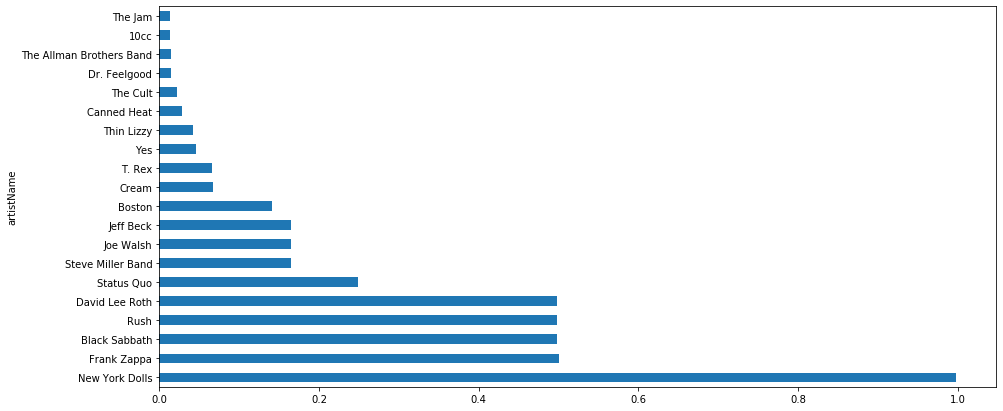

In [191]:
fig, ax = plt.subplots(figsize=(15,7))
artist_recency.head(20).plot.barh(ax=ax)

**Can't say I know many of these artists. Reducing the weight this parameter might be done in future weighting.**